<a href="https://colab.research.google.com/github/ReznikovVA/Advent-2023/blob/master/homework_01_matplotlib_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы машинного обучения, ВИОКИС

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 1. Библиотеки Matplotlib, Seaborn

Задание выполнил(а):

    (впишите свои фамилию и имя)

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'

### Задание 1 (0.5 балла)

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

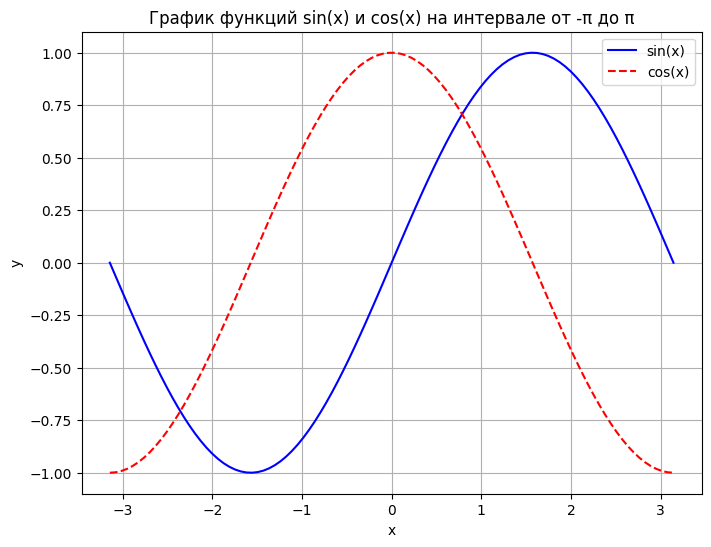

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив значений x
x = np.linspace(-np.pi, np.pi, 100)

y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(8, 6))

plt.plot(x, y_sin, color='blue', linestyle='-', label='sin(x)')
plt.plot(x, y_cos, color='red', linestyle='--', label='cos(x)')

plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функций sin(x) и cos(x) на интервале от -π до π')
plt.show()

### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

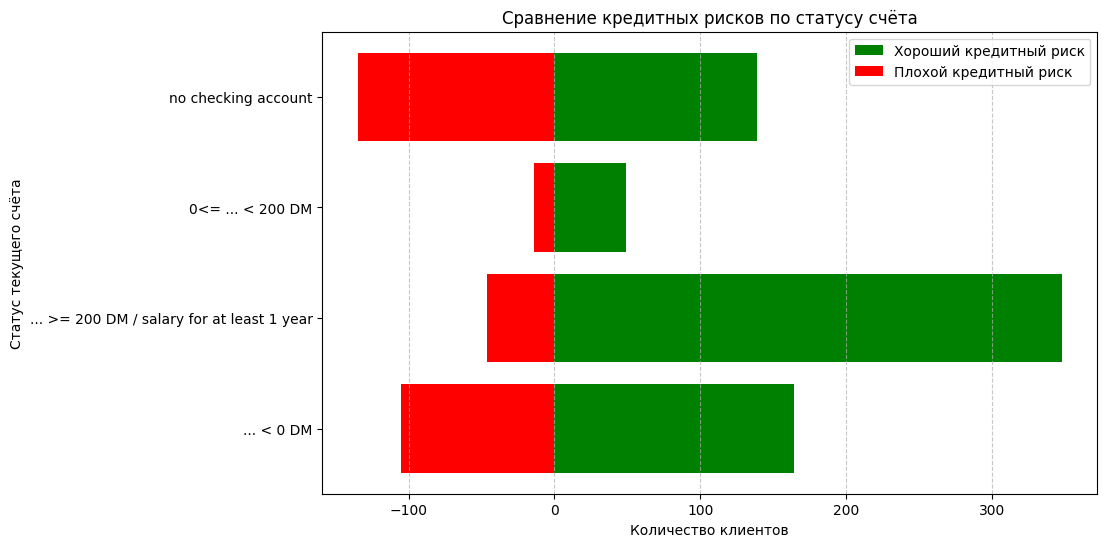

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(GERMAN_CREDIT)

# Группируем данные по статусу счёта и кредитному риску
grouped_data = data.groupby(['status', 'credit_risk']).size().unstack()

# Построение зеркальных горизонтальных гистограмм
plt.figure(figsize=(10, 6))
plt.barh(grouped_data.index, grouped_data['good'], color='green', label='Хороший кредитный риск')
plt.barh(grouped_data.index, -grouped_data['bad'], color='red', label='Плохой кредитный риск')

# Оформление
plt.xlabel('Количество клиентов')
plt.ylabel('Статус текущего счёта')
plt.title('Сравнение кредитных рисков по статусу счёта')
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Задание 3  (0.5 балла)

In [8]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

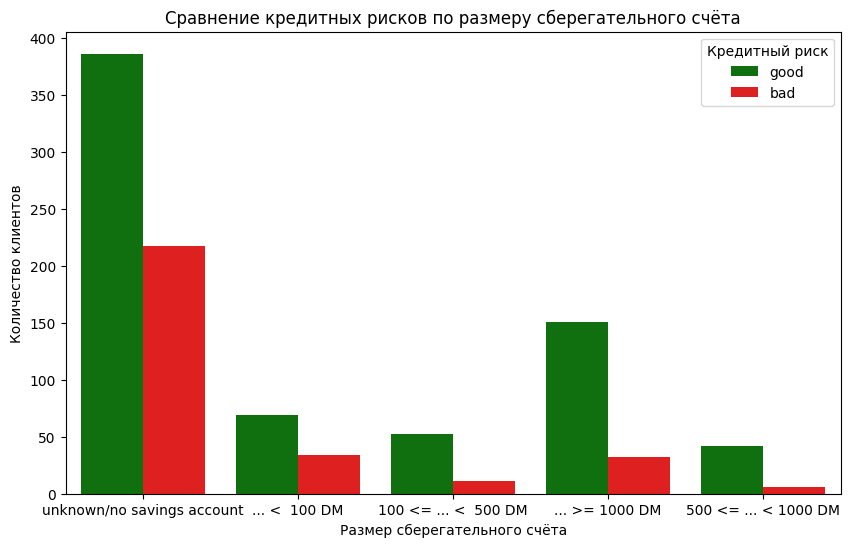

In [9]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='savings', hue='credit_risk', palette={'good': 'green', 'bad': 'red'})

# Оформление
plt.xlabel('Размер сберегательного счёта')
plt.ylabel('Количество клиентов')
plt.title('Сравнение кредитных рисков по размеру сберегательного счёта')
plt.legend(title='Кредитный риск', loc='upper right')
plt.show()

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

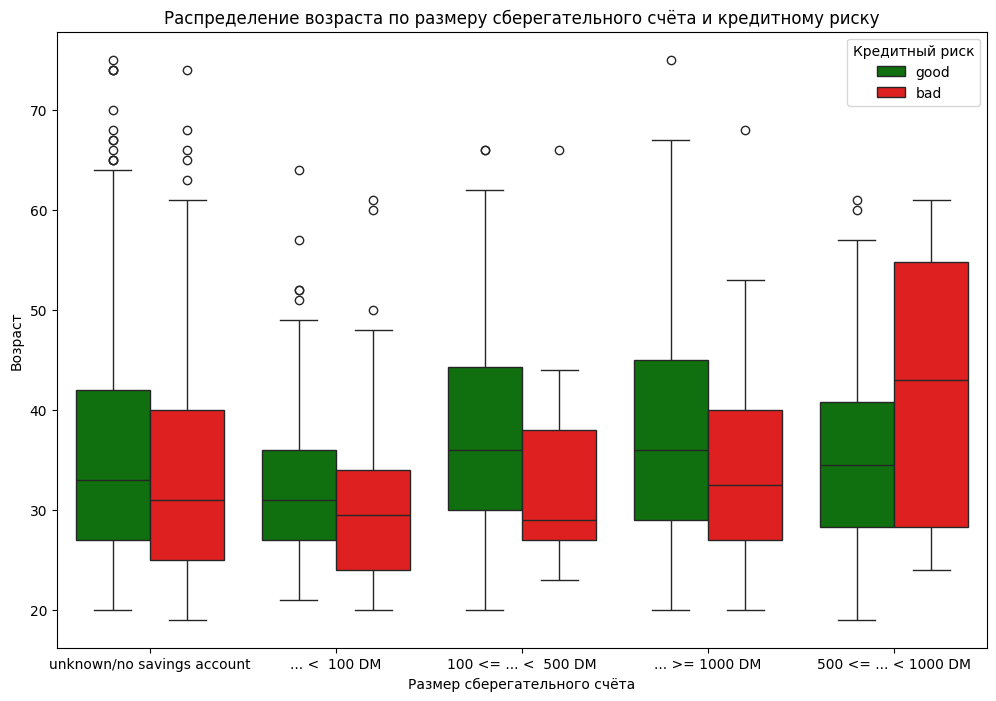

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='savings', y='age', hue='credit_risk', palette={'good': 'green', 'bad': 'red'})

# Оформление
plt.xlabel('Размер сберегательного счёта')
plt.ylabel('Возраст')
plt.title('Распределение возраста по размеру сберегательного счёта и кредитному риску')
plt.legend(title='Кредитный риск', loc='upper right')
plt.show()

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

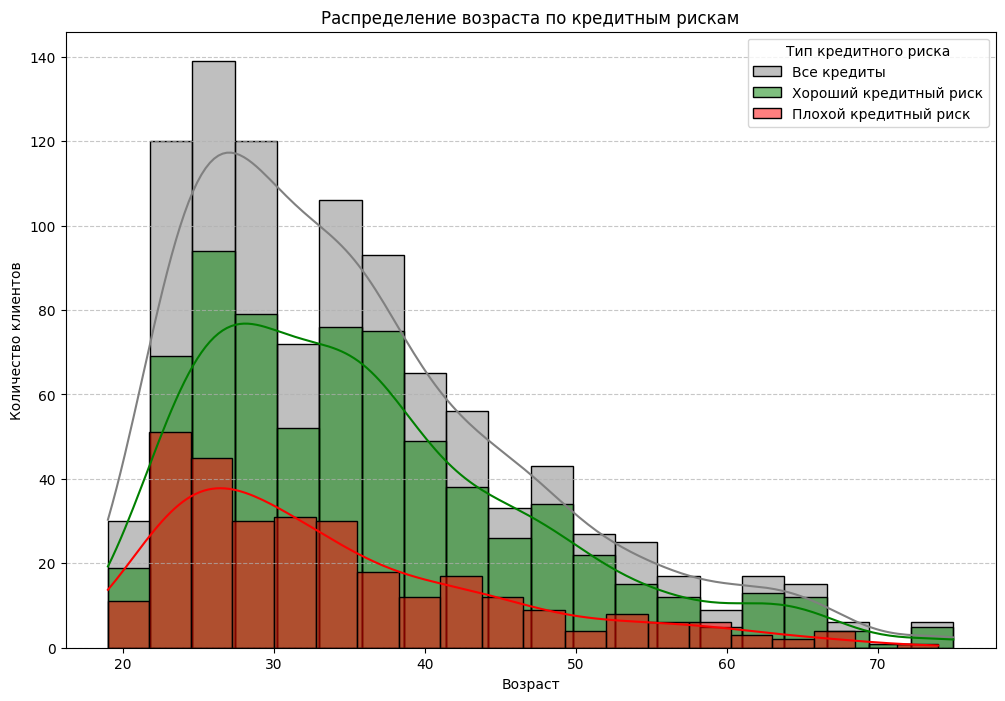

In [11]:
plt.figure(figsize=(12, 8))

# Гистограмма для всех кредитов
sns.histplot(data=data, x='age', bins=20, color='gray', label='Все кредиты', kde=True, alpha=0.5)

# Гистограмма для положительных кейсов (хороший кредитный риск)
sns.histplot(data=data[data['credit_risk'] == 'good'], x='age', bins=20, color='green', label='Хороший кредитный риск', kde=True, alpha=0.5)

# Гистограмма для отрицательных кейсов (плохой кредитный риск)
sns.histplot(data=data[data['credit_risk'] == 'bad'], x='age', bins=20, color='red', label='Плохой кредитный риск', kde=True, alpha=0.5)

# Оформление
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.title('Распределение возраста по кредитным рискам')
plt.legend(title='Тип кредитного риска', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

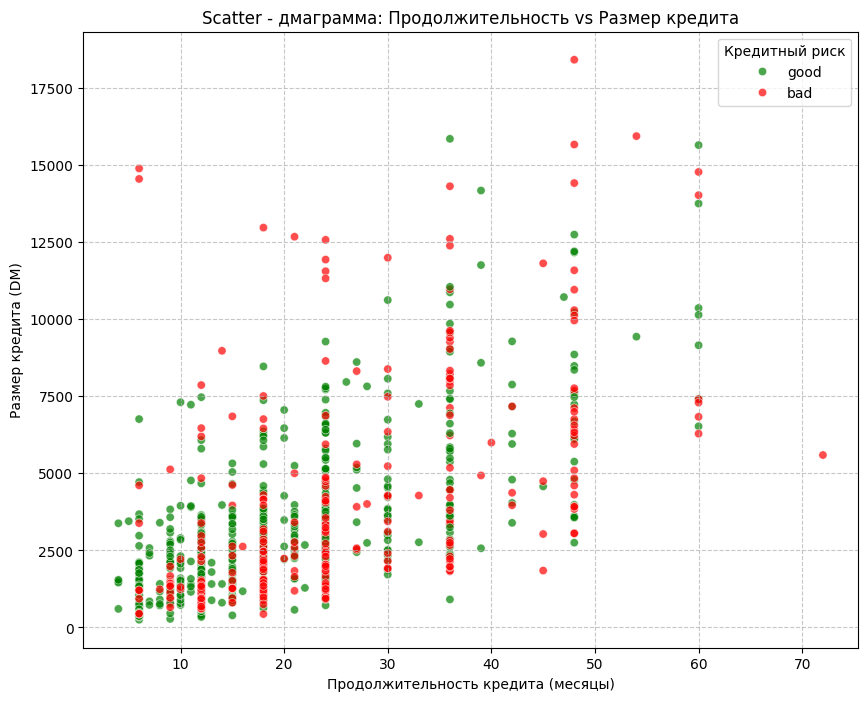

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='duration', y='amount', hue='credit_risk',
                palette={'good': 'green', 'bad': 'red'}, alpha=0.7)

# Оформление
plt.xlabel('Продолжительность кредита (месяцы)')
plt.ylabel('Размер кредита (DM)')
plt.title('Scatter - дмаграмма: Продолжительность vs Размер кредита')
plt.legend(title='Кредитный риск', loc='upper right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

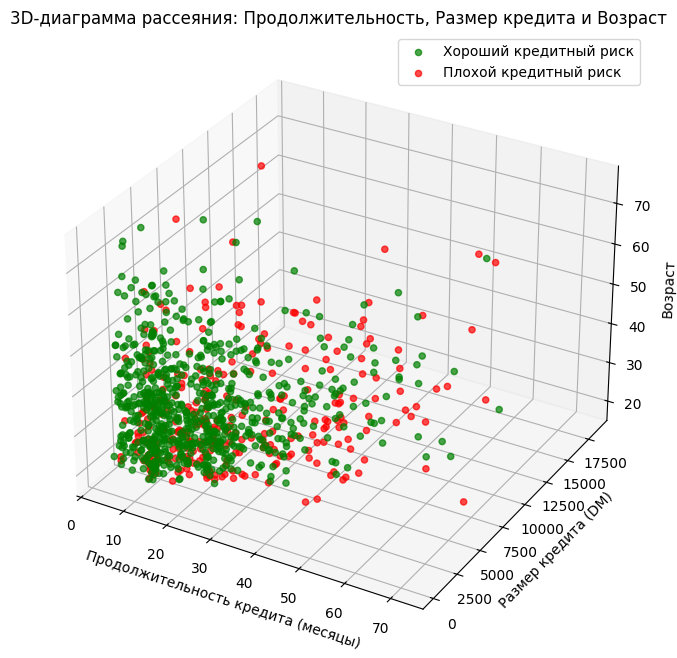

In [14]:
# Создаем 3D-график
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Разделяем данные на положительные и отрицательные кейсы
good_risk = data[data['credit_risk'] == 'good']
bad_risk = data[data['credit_risk'] == 'bad']

# Построение точек для хороших кредитных рисков
ax.scatter(good_risk['duration'], good_risk['amount'], good_risk['age'],
           c='green', label='Хороший кредитный риск', alpha=0.7)

# Построение точек для плохих кредитных рисков
ax.scatter(bad_risk['duration'], bad_risk['amount'], bad_risk['age'],
           c='red', label='Плохой кредитный риск', alpha=0.7)

# Оформление
ax.set_xlabel('Продолжительность кредита (месяцы)')
ax.set_ylabel('Размер кредита (DM)')
ax.set_zlabel('Возраст')
ax.set_title('3D-диаграмма рассеяния: Продолжительность, Размер кредита и Возраст')
ax.legend(loc='upper right')
plt.show()

## Раздел 2. Визуализации в датасете Netflix

In [15]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов имеет пропуски в столбце director.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

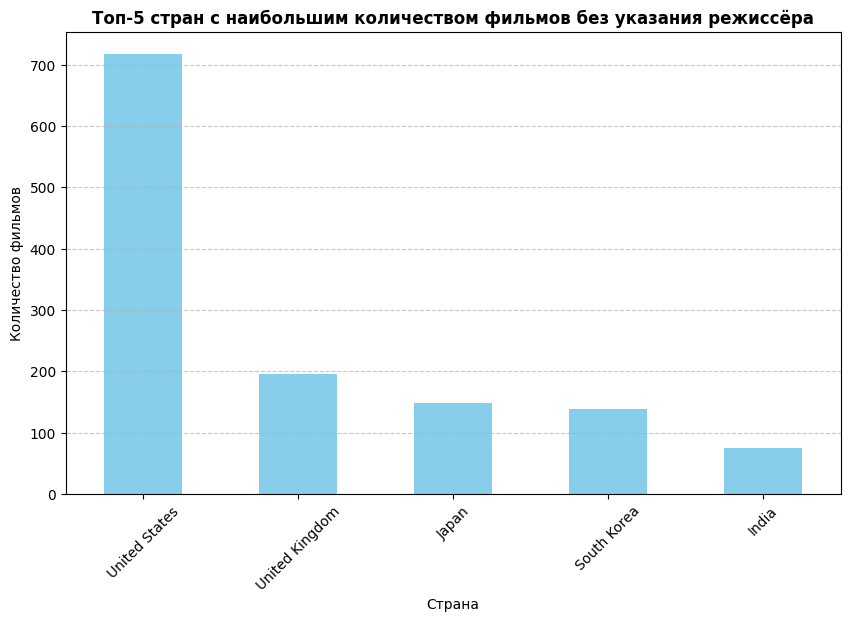

In [16]:
data = pd.read_csv(NETFLIX_TITLES)

# Подсчёт пропусков в колонке director
data['director_missing'] = data['director'].isna()

# Группировка по странам и подсчёт пропусков
missing_by_country = data.groupby('country')['director_missing'].sum().sort_values(ascending=False)

# Выбор топ-5 стран
top_5_countries = missing_by_country.head(5)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')

# Оформление
plt.title('Топ-5 стран с наибольшим количеством фильмов без указания режиссёра', fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

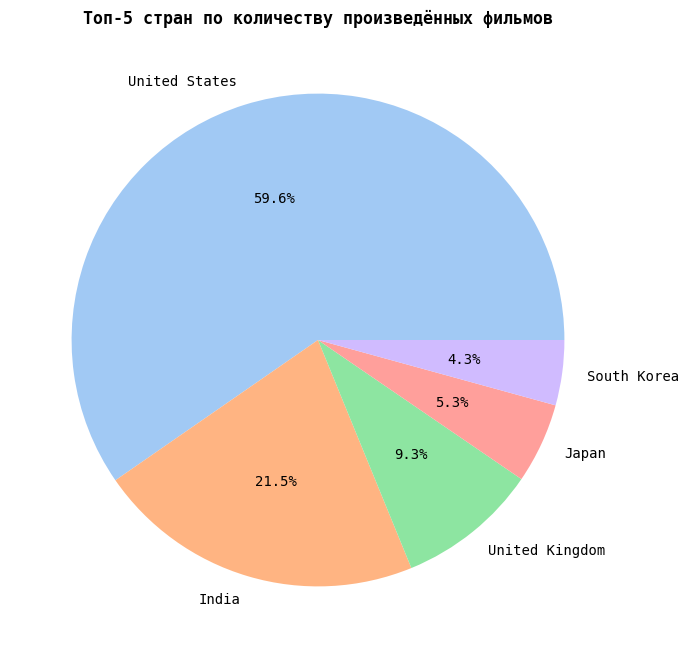

In [17]:
movies_by_country = data['country'].value_counts().head(5)

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(8, 8))
plt.pie(movies_by_country, labels=movies_by_country.index, autopct='%1.1f%%',
        colors=colors, textprops={'family': 'monospace'})

plt.title('Топ-5 стран по количеству произведённых фильмов',
          fontweight='bold', fontfamily='monospace')

plt.show()

### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

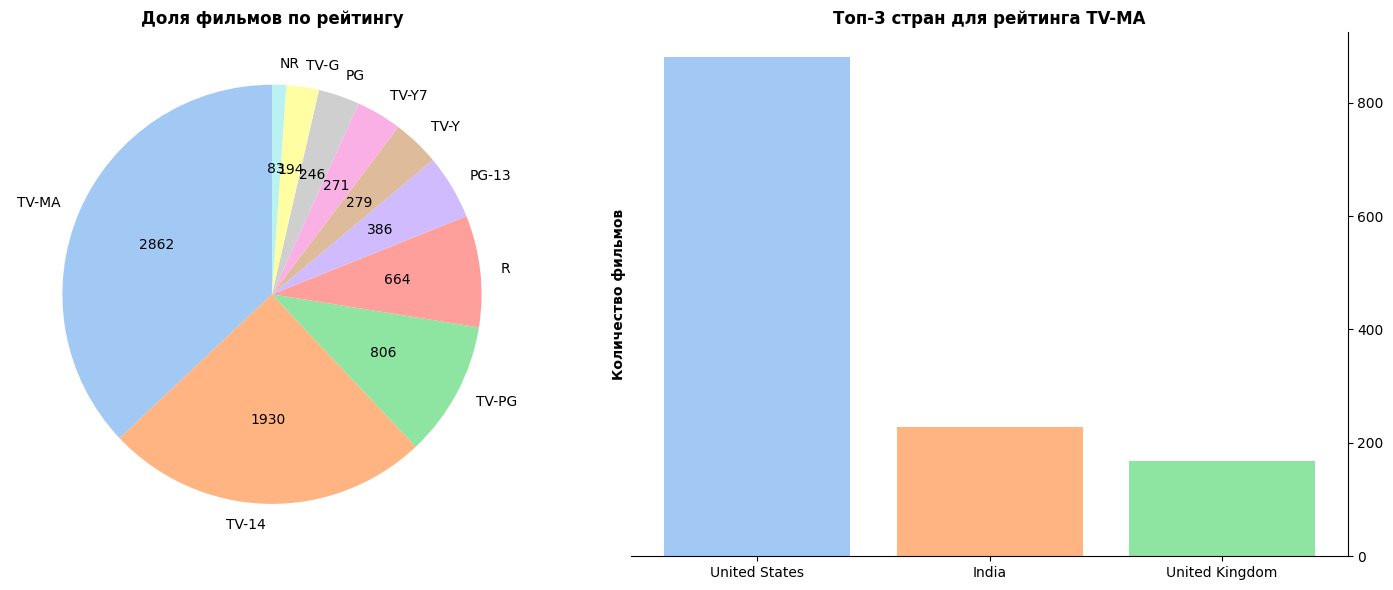

In [18]:
# Фильтруем рейтинги, оставляя только те, у которых больше 50 фильмов
rating_counts = data['rating'].value_counts()
filtered_ratings = rating_counts[rating_counts >= 50]

# Данные для второго графика: топ-3 страны для рейтинга TV-MA
tv_ma_data = data[data['rating'] == 'TV-MA']
top_3_countries = tv_ma_data['country'].value_counts().head(3)

# Создаем subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Круговая диаграмма (первый график)
ax1.pie(filtered_ratings, labels=filtered_ratings.index, autopct=lambda p: f'{int(p * sum(filtered_ratings) / 100)}',
        colors=sns.color_palette('pastel'), startangle=90)
ax1.set_title('Доля фильмов по рейтингу', fontweight='bold')

# Столбчатая диаграмма (второй график)
ax2.bar(top_3_countries.index, top_3_countries.values, color=sns.color_palette('pastel'))
ax2.yaxis.tick_right()  # Ось Y справа
ax2.set_ylabel('Количество фильмов', fontweight='bold')
ax2.set_xlabel('')  # Убираем подпись оси X
ax2.set_title('Топ-3 стран для рейтинга TV-MA', fontweight='bold')

# Убираем левую и верхнюю границы
for spine in ax2.spines:
    if spine not in ['right', 'bottom']:
        ax2.spines[spine].set_visible(False)

# Отображение
plt.tight_layout()
plt.show()

### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

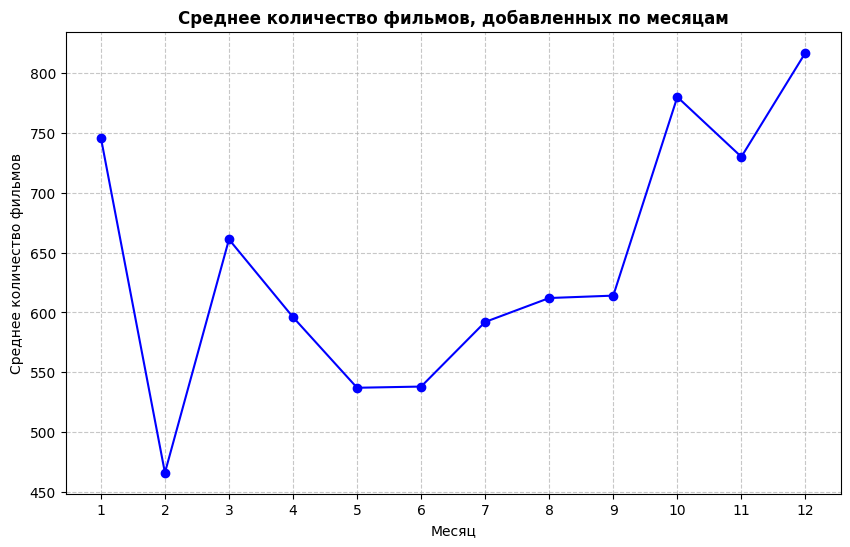

In [19]:
# Преобразуем колонку date_added в datetime
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')

# Создаем новые столбцы month и year
data['month'] = data['date_added'].dt.month
data['year'] = data['date_added'].dt.year

# Группируем по месяцам и считаем среднее количество фильмов
monthly_avg = data.groupby('month').size()

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='blue')

# Оформление
plt.title('Среднее количество фильмов, добавленных по месяцам', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество фильмов')
plt.xticks(range(1, 13))  # Ось X от 1 до 12 с шагом 1
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Задание 5 (1 балл)

Постройте линеный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

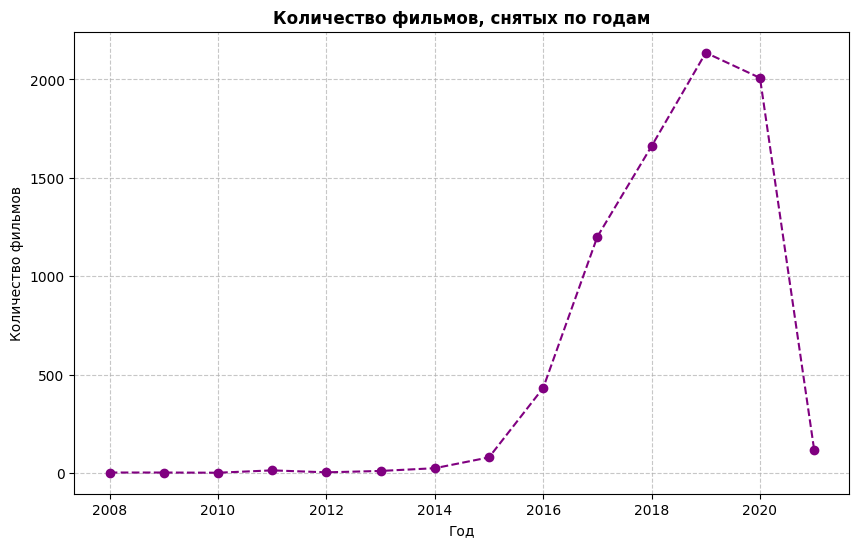

In [20]:
# Преобразуем колонку date_added в datetime
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')

# Создаем новый столбец year
data['year'] = data['date_added'].dt.year

# Группируем по годам и считаем количество фильмов
yearly_counts = data.groupby('year').size()

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, linestyle='--', color='purple', marker='o')

# Оформление
plt.title('Количество фильмов, снятых по годам', fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid(linestyle='--', alpha=0.7)  # Добавляем сетку
plt.show()

### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

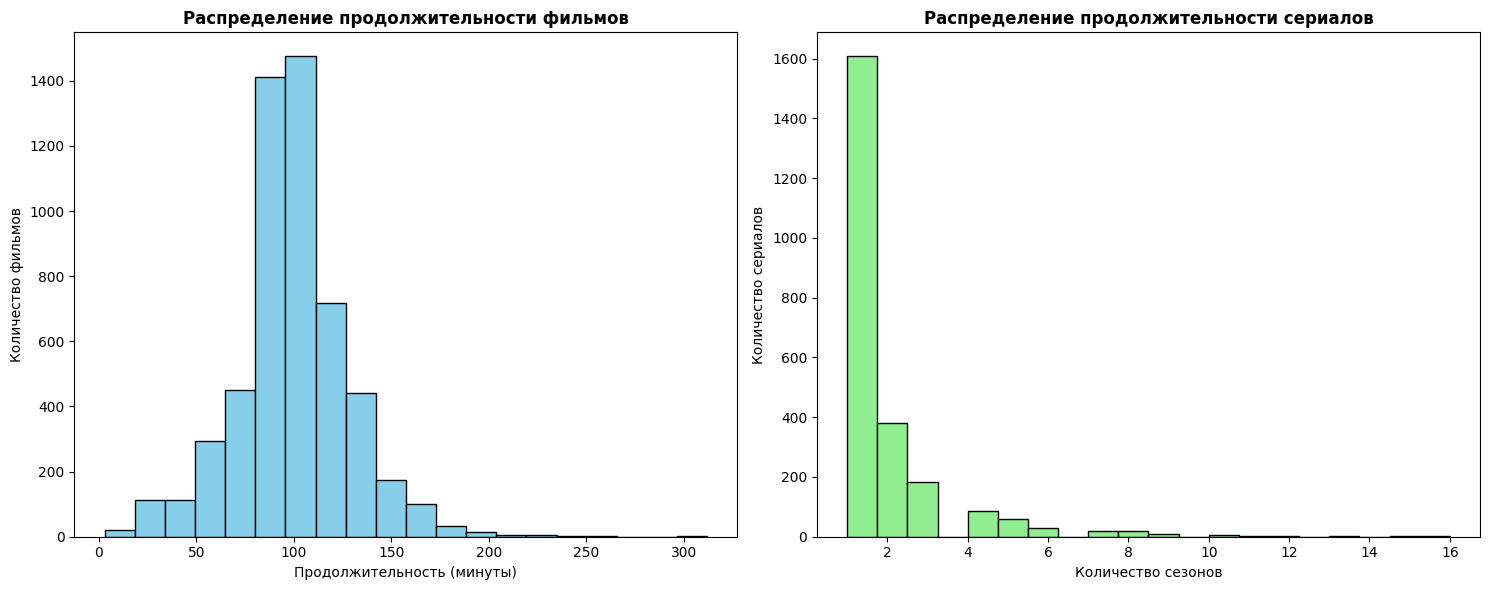

In [21]:
# Создаем новые столбцы min и season
data['min'] = data[data['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
data['season'] = data[data['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)

# Создаем subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма для фильмов (продолжительность в минутах)
ax1.hist(data['min'].dropna(), bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Распределение продолжительности фильмов', fontweight='bold')
ax1.set_xlabel('Продолжительность (минуты)')
ax1.set_ylabel('Количество фильмов')

# Гистограмма для сериалов (количество сезонов)
ax2.hist(data['season'].dropna(), bins=20, color='lightgreen', edgecolor='black')
ax2.set_title('Распределение продолжительности сериалов', fontweight='bold')
ax2.set_xlabel('Количество сезонов')
ax2.set_ylabel('Количество сериалов')

# Отображение
plt.tight_layout()
plt.show()

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

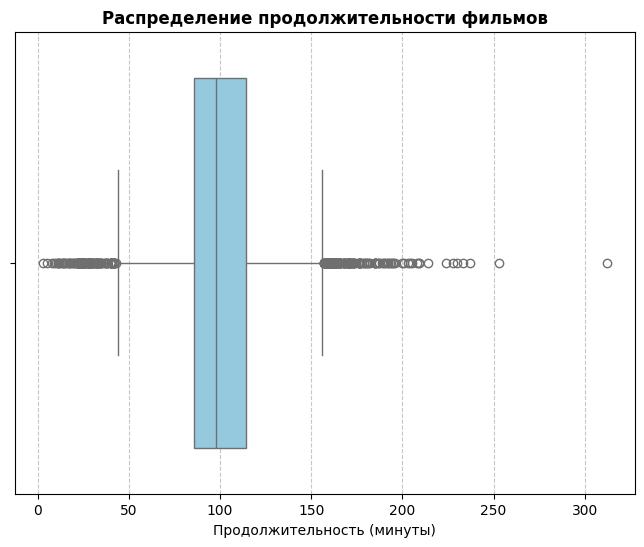

In [22]:
# Создаем столбец min для фильмов
data['min'] = data[data['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)

# Построение ящика с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['min'].dropna(), color='skyblue')

# Оформление
plt.title('Распределение продолжительности фильмов', fontweight='bold')
plt.xlabel('Продолжительность (минуты)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Задание 8 (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [24]:
import plotly.express as px

# Создаем новый столбец year
data['year'] = data['date_added'].dt.year

# Фильтруем данные с 2000 года
data = data[data['year'] >= 2000]

# Создаем столбцы min и season
data['min'] = data[data['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
data['season'] = data[data['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)

# Группируем по году и типу контента, считаем среднюю продолжительность
avg_duration = data.groupby(['year', 'type']).agg({'min': 'mean', 'season': 'mean'}).reset_index()

# Объединяем min и season в один столбец duration
avg_duration['duration'] = avg_duration.apply(lambda row: row['min'] if pd.notna(row['min']) else row['season'], axis=1)

# Построение интерактивной столбчатой диаграммы
fig = px.bar(avg_duration, x='year', y='duration', color='type', barmode='group',
             labels={'year': 'Год', 'duration': 'Средняя продолжительность', 'type': 'Тип контента'},
             title='Средняя продолжительность фильмов и сериалов по годам (с 2000 года)',
             text='duration')

# Настройка отображения
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Год', yaxis_title='Средняя продолжительность',
                  title_font=dict(size=20, family='Arial', color='black'),
                  xaxis=dict(tickmode='linear', dtick=1))

# Отображение графика
fig.show()